In [ ]:
                                ## LOGISTIC REGRESSION ASSIGNMENT  ##

In [ ]:
# uploading the dataset
from google.colab import files
uploaded = files.upload()


Saving Titanic_train.csv to Titanic_train.csv


In [ ]:
# Reading the dataset
import pandas as pd
df_Titanic=pd.read_csv("Titanic_train.csv")
df_Titanic=pd.read_csv("Titanic_train.csv")
df_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_Titanic.shape
#number of people on the ship =891
#number of features = 12

(891, 12)

In [ ]:
# Check for missing values
df_Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# now lets check how many people survived in the incident
df_Titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

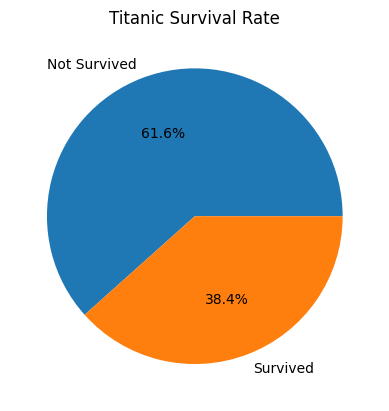

In [ ]:
#now let's make a piechart to visualise
import matplotlib.pyplot as plt

survived = df_Titanic['Survived'].value_counts()

plt.pie(survived, labels=['Not Survived', 'Survived'], autopct="%1.1f%%")
plt.title("Titanic Survival Rate")
plt.show()


In [ ]:
df_Titanic["Sex"].value_counts()
#There are 577 male passengers and 314 female passengers on the ship.

Sex
male      577
female    314
Name: count, dtype: int64

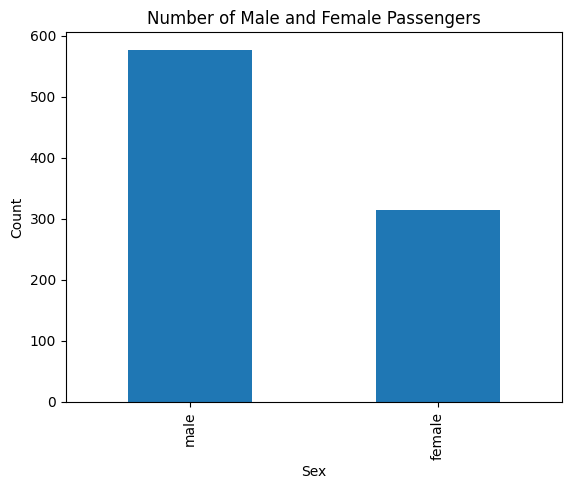

In [ ]:
# now lets compare the number of male and female on board
df_Titanic['Sex'].value_counts().plot(kind='bar')
plt.title('Number of Male and Female Passengers')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()
# the number of male is higher than female

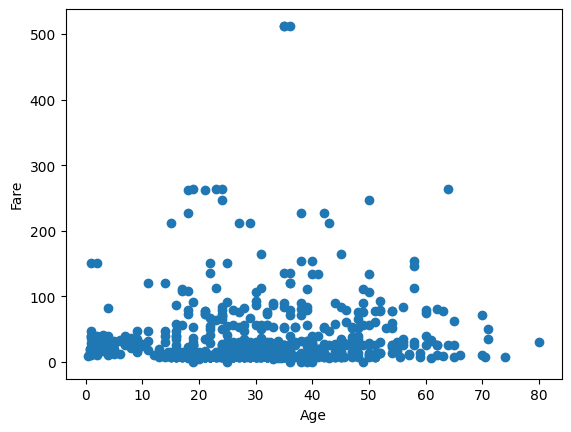

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_Titanic['Age'], df_Titanic['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

<Axes: ylabel='Age'>

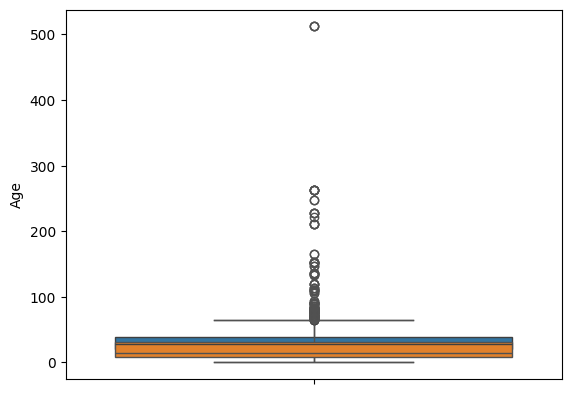

In [ ]:
# Check for outliers
import seaborn as sns
sns.boxplot(df_Titanic['Age'])
sns.boxplot(df_Titanic['Fare'])

In [ ]:

# Remove outliers
df_Titanic = df_Titanic[~((df_Titanic['Age'] < 16) | (df_Titanic['Age'] > 60))]
df_Titanic = df_Titanic[~((df_Titanic['Fare'] < 8) | (df_Titanic['Fare'] > 50))]
df_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [ ]:
# Now lets apply label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Titanic['Sex'] = le.fit_transform(df_Titanic['Sex'])
df_Titanic['Embarked'] = le.fit_transform(df_Titanic['Embarked'])
df_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,2
5,6,0,3,"Moran, Mr. James",1,31.995441,0,0,330877,8.4583,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.000000,0,0,113783,26.5500,C103,2
12,13,0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,0,2


In [ ]:
df_Titanic['Age'] = df_Titanic['Age'].fillna(df_Titanic['Age'].mean())
df_Titanic['Cabin'] = df_Titanic['Cabin'].fillna(0)
df_Titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,2
5,6,0,3,"Moran, Mr. James",1,31.995441,0,0,330877,8.4583,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.000000,0,0,113783,26.5500,C103,2
12,13,0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,0,2


In [ ]:
X_cont = df_Titanic[['Pclass','Sex','Age']]
X_cont

,Pclass,Sex,Age
4,3,1,35.000000
5,3,1,31.995441
8,3,0,27.000000
11,1,0,58.000000
12,3,1,20.000000
...,...,...,...
885,3,0,39.000000
886,2,1,27.000000
887,1,0,19.000000
888,3,0,31.995441


In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X_cont)
SS_X = pd.DataFrame(SS_X)
D1=['Pclass','Sex','Age']

In [ ]:
SS_X.columns = D1
SS_X.head()

,Pclass,Sex,Age
0,0.931686,0.732203,0.307996
1,0.931686,0.732203,0.000000
2,0.931686,-1.365741,-0.512080
3,-1.825832,-1.365741,2.665712
4,0.931686,0.732203,-1.229646


In [ ]:
#Split the variable as X and Y
Y =df_Titanic['Survived']
X = SS_X

In [ ]:
# Let's fit our model now
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,Y)
Y_pred =logreg.predict(X)
Y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm=confusion_matrix(Y,Y_pred)
cm

array([[248,  20],
       [ 58,  78]])

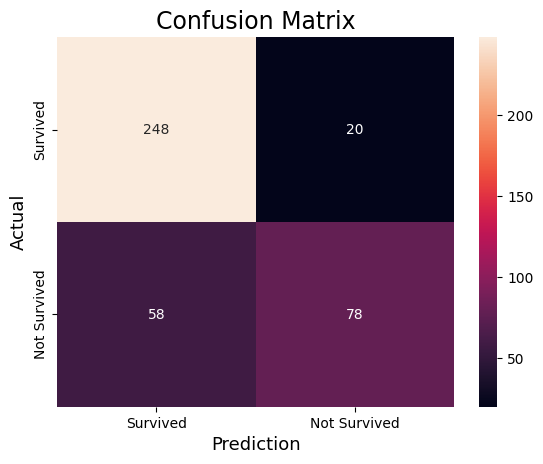

In [ ]:
cm = confusion_matrix(Y,Y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [ ]:
AS = accuracy_score(Y,Y_pred)
print("Accuracy score:", AS.round(3))

Accuracy score: 0.807


In [ ]:
from sklearn.metrics import recall_score, precision_score,f1_score
print("Sensitivity score: ", recall_score(Y,Y_pred).round(2))
print("Precision score: ", precision_score(Y,Y_pred).round(2))
print("F1 score: ", f1_score(Y,Y_pred).round(2))

Sensitivity score:  0.57
Precision score:  0.8
F1 score:  0.67


In [ ]:
TN = cm[0,0]
FP = cm[0,1]
TNR = TN/(TN + FP)
print("specificity score: ", TNR.round(2))

specificity score:  0.93


ROC-AUC Score: 0.749


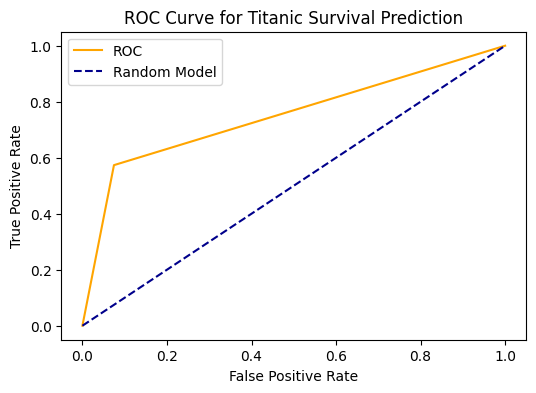

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC score
roc_auc = roc_auc_score(Y, Y_pred)
print("ROC-AUC Score:", roc_auc.round(3))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y, Y_pred)

# Visualize ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Titanic Survival Prediction")
plt.legend()
plt.show()

🔍 Observation:

The dataset contains information about 891 passengers and 12 features including survival status, passenger class, age, sex, fare, and more.

There were missing values in Age, Cabin, and Embarked. These were handled using imputation techniques.

Exploratory Data Analysis revealed:

Around 38% of passengers survived the Titanic disaster.

There were more males (577) on board than females (314).

The number of survivors was significantly higher among females.

Outliers were identified and removed from Age and Fare to improve model performance.

Logistic Regression was trained using standardized values of Pclass, Sex, and Age.

Evaluation metrics:

Accuracy: 80.7%

Precision: 0.80

Recall (Sensitivity): 0.57

F1 Score: 0.67

Specificity: 0.93

ROC-AUC Score: 0.749
